<a href="https://colab.research.google.com/github/GunarsA/LU-VT/blob/main/LU_VT_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Valodu tehnoloģijas Md1 - Gunārs Ābeltiņš ga22008


Mājas darbs ir veidots uz prakstiskā darba bāzes izmantojot citus lietvārdus. Demonstrētas visas sešas deklinācijas. Kā arī papildus tiek pielikti daži likumi.

In [96]:
!pip install hfst
import hfst
from IPython.display import Image

In [97]:
import sys

def hfst2png(transducer, png_name):
    # Write the FST to a file using the att format
    f = open("a.att", "w", encoding="utf-8")
    transducer.minimize()
    transducer.write_att(f, False)

    # Convert the FST file to the dot format
    # dot format is used by graphviz library for graph visualization
    f = open("a.att", "r", encoding="utf-8")
    with open("graph.dot", "w", encoding="utf-8") as out_f:
        out_f.write('digraph G { rankdir="LR"\n')
        out_f.write('node [fontname="Tahoma",shape=circle,fontsize=14,fixedsize=true,fillcolor="grey",style=filled]\n')
        out_f.write('edge [fontname="FreeMono",fontsize=14]\n')
        for line in f.readlines():
            line = line.strip()
            row = line.split('\t')
            if len(row) >= 4:
                out_f.write('%s [label="%s"];\n' % (row[0], row[0]))
                out_f.write('%s -> %s [label="%s:%s"];\n' % (row[0], row[1], row[2], row[3]))
            elif len(row) == 1: # Final state
                out_f.write('%s [label="%s",shape=doublecircle];\n' % (row[0], row[0]))
        out_f.write('}')

    # Call graphviz dot function to generate a png file from dot file
    !dot -Tpng graph.dot > $png_name

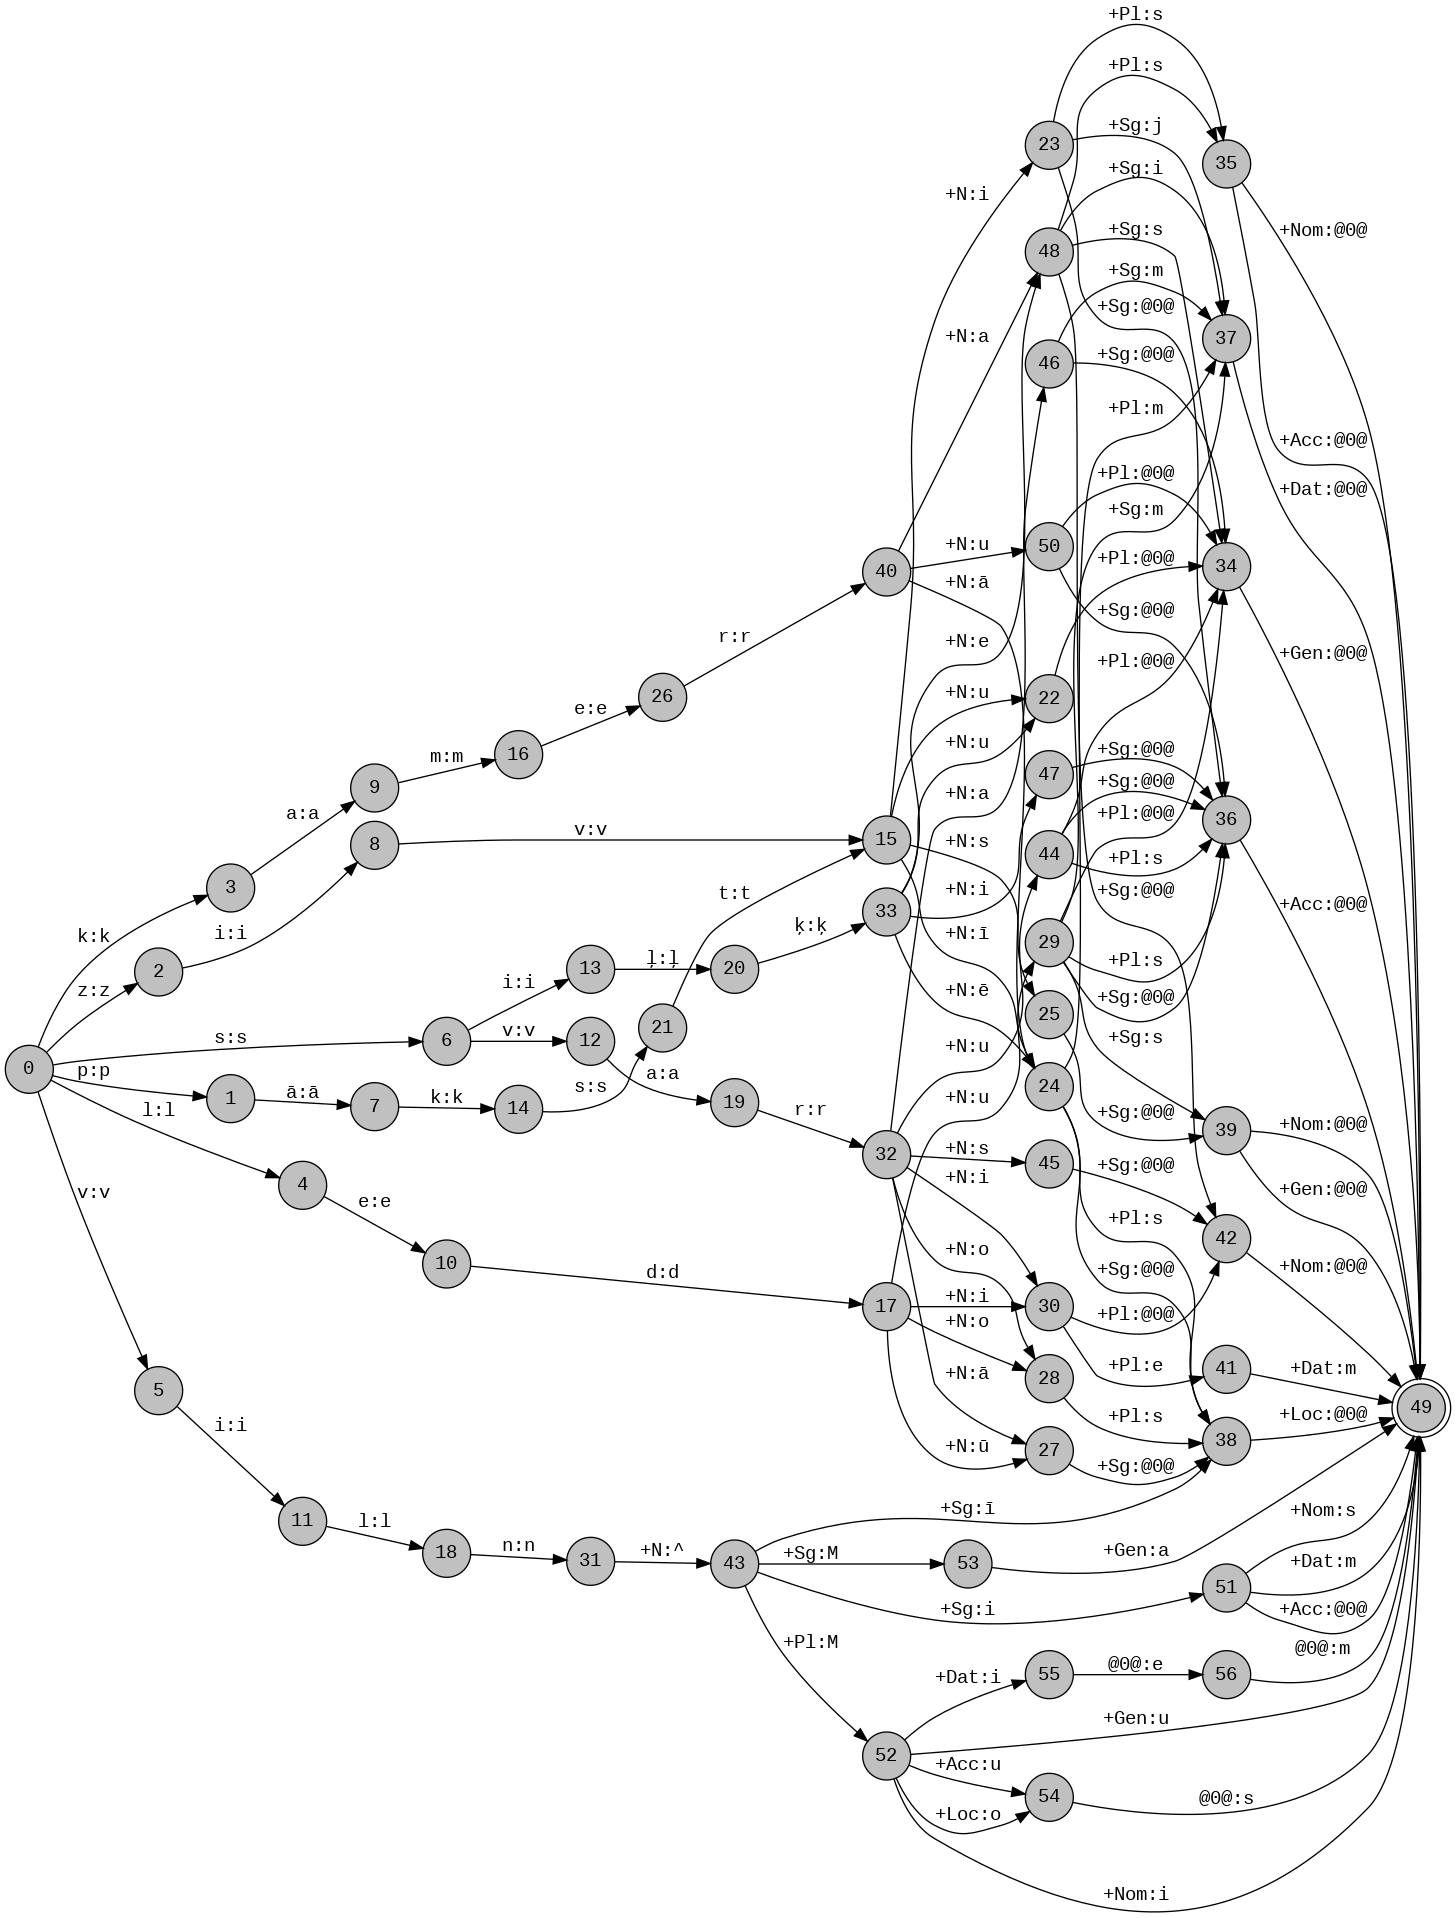

In [98]:
import tempfile

lexicon = """
Multichar_Symbols +N +Sg +Pl +Nom +Gen +Dat +Acc +Loc

LEXICON Root
Noun;

LEXICON Noun
! "^" apzīmē izņēmuma vārdu
svar   N1dekl;  ! 1. deklinācija (vīriešu dzimte, -s)
viln   N2dekl;  ! 2. deklinācija (vīriešu dzimte, -is)
led    N3dekl;  ! 3. deklinācija (vīriešu dzimte, -us)
kamer  N4dekl;  ! 4. deklinācija (sieviešu dzimte, -a)
siļķ^  N5dekl;  ! 5. deklinācija (sieviešu dzimte, -e)
ziv    N6dekl;  ! 6. deklinācija (sieviešu dzimte, -s)
pākst  N6dekl;  ! 6. deklinācija (sieviešu dzimte, -s)

LEXICON N1dekl ! Vīriešu dzimte, -s galotne
+N+Sg+Nom:s #;
+N+Sg+Gen:a #;
+N+Sg+Dat:am #;
+N+Sg+Acc:u #;
+N+Sg+Loc:ā #;
+N+Pl+Nom:i #;
+N+Pl+Gen:u #;
+N+Pl+Dat:iem #;
+N+Pl+Acc:us #;
+N+Pl+Loc:os #;

LEXICON N2dekl ! Vīriešu dzimte, -is galotne
! Formās ar "^M" notiek līdzskaņu mija
+N+Sg+Nom:^is #;
+N+Sg+Gen:^Ma #;
+N+Sg+Dat:^im #;
+N+Sg+Acc:^i #;
+N+Sg+Loc:^ī #;
+N+Pl+Nom:^Mi #;
+N+Pl+Gen:^Mu #;
+N+Pl+Dat:^Miem #;
+N+Pl+Acc:^Mus #;
+N+Pl+Loc:^Mos #;

LEXICON N3dekl ! Vīriešu dzimte, -us galotne
+N+Sg+Nom:us #;
+N+Sg+Gen:us #;
+N+Sg+Dat:um #;
+N+Sg+Acc:u #;
+N+Sg+Loc:ū #;
+N+Pl+Nom:i #;
+N+Pl+Gen:u #;
+N+Pl+Dat:iem #;
+N+Pl+Acc:us #;
+N+Pl+Loc:os #;

LEXICON N4dekl ! Sieviešu dzimte, -a galotne
+N+Sg+Nom:a #;
+N+Sg+Gen:as #;
+N+Sg+Dat:ai #;
+N+Sg+Acc:u #;
+N+Sg+Loc:ā #;
+N+Pl+Nom:as #;
+N+Pl+Gen:u #;
+N+Pl+Dat:ām #;
+N+Pl+Acc:as #;
+N+Pl+Loc:ās #;

LEXICON N5dekl ! Sieviešu dzimte, -e galotne
+N+Sg+Nom:e #;
+N+Sg+Gen:es #;
+N+Sg+Dat:ei #;
+N+Sg+Acc:i #;
+N+Sg+Loc:ē #;
+N+Pl+Nom:es #;
+N+Pl+Gen:u #;
+N+Pl+Dat:ēm #;
+N+Pl+Acc:es #;
+N+Pl+Loc:ēs #;

LEXICON N6dekl ! Sieviešu dzimte, -s galotne
! Formās ar "^M" notiek līdzskaņu mija
+N+Sg+Nom:s #;
+N+Sg+Gen:s #;
+N+Sg+Dat:ij #;
+N+Sg+Acc:i #;
+N+Sg+Loc:ī #;
+N+Pl+Nom:is #;
+N+Pl+Gen:u #;
+N+Pl+Dat:īm #;
+N+Pl+Acc:is #;
+N+Pl+Loc:īs #;
"""

# Create a temporary file with your lexc content
with tempfile.NamedTemporaryFile(mode='w', delete=False, suffix='.lexc') as f:
    f.write(lexicon)
    temp_filename = f.name

# Compile from the temporary file
generator = hfst.compile_lexc_file(temp_filename)

# Vizualizācija
hfst2png(generator,'generator.png')
Image('generator.png')

In [99]:
from hfst import regex, HfstTransducer

### Iespraušana

In [100]:
Insert = hfst.regex('[..] -> j || [b | f | m | p | v] _ "^" M')
print(Insert.lookup("ziv^Mu'"))

(("zivj^Mu'", 0.0),)


### Aizstāšana

In [101]:
Replacement = hfst.regex('l n -> ļ ņ ||  _ "^" M')
print(Replacement.lookup("viln^Ma'"))

(("viļņ^Ma'", 0.0),)


### Izņēmumi

In [102]:
Exceptions = hfst.regex('e i-> e m || s i ļ ķ "^"  _')
print(Exceptions.lookup("siļķei"))

(('siļķem', 0.0),)


### Dzēšana

In [103]:
Cleanup = hfst.regex('(M -> 0) .o.("^" -> 0)')
print(Cleanup.lookup("viļņ^Ma'"))
Erase = hfst.regex(' st -> š || _ "^" M')
print(Erase.lookup("pākst^Mu'"))

(("viļņ@_EPSILON_SYMBOL_@@_EPSILON_SYMBOL_@a'", 0.0),)
(("pākš^Mu'", 0.0),)


## FST apvienošana

In [107]:
from hfst import compose
cascade = compose((generator, Insert, Replacement, Exceptions, Cleanup))

inv = hfst.HfstTransducer(cascade)
inv.invert()
inv.convert(hfst.ImplementationType.HFST_OL_TYPE)
print(inv.lookup("svars"))
print(inv.lookup("viļņa"))

(('svar+N+Sg+Nom', 0.0),)
(('viln+N+Sg+Gen', 0.0),)


## FST vizualizācija

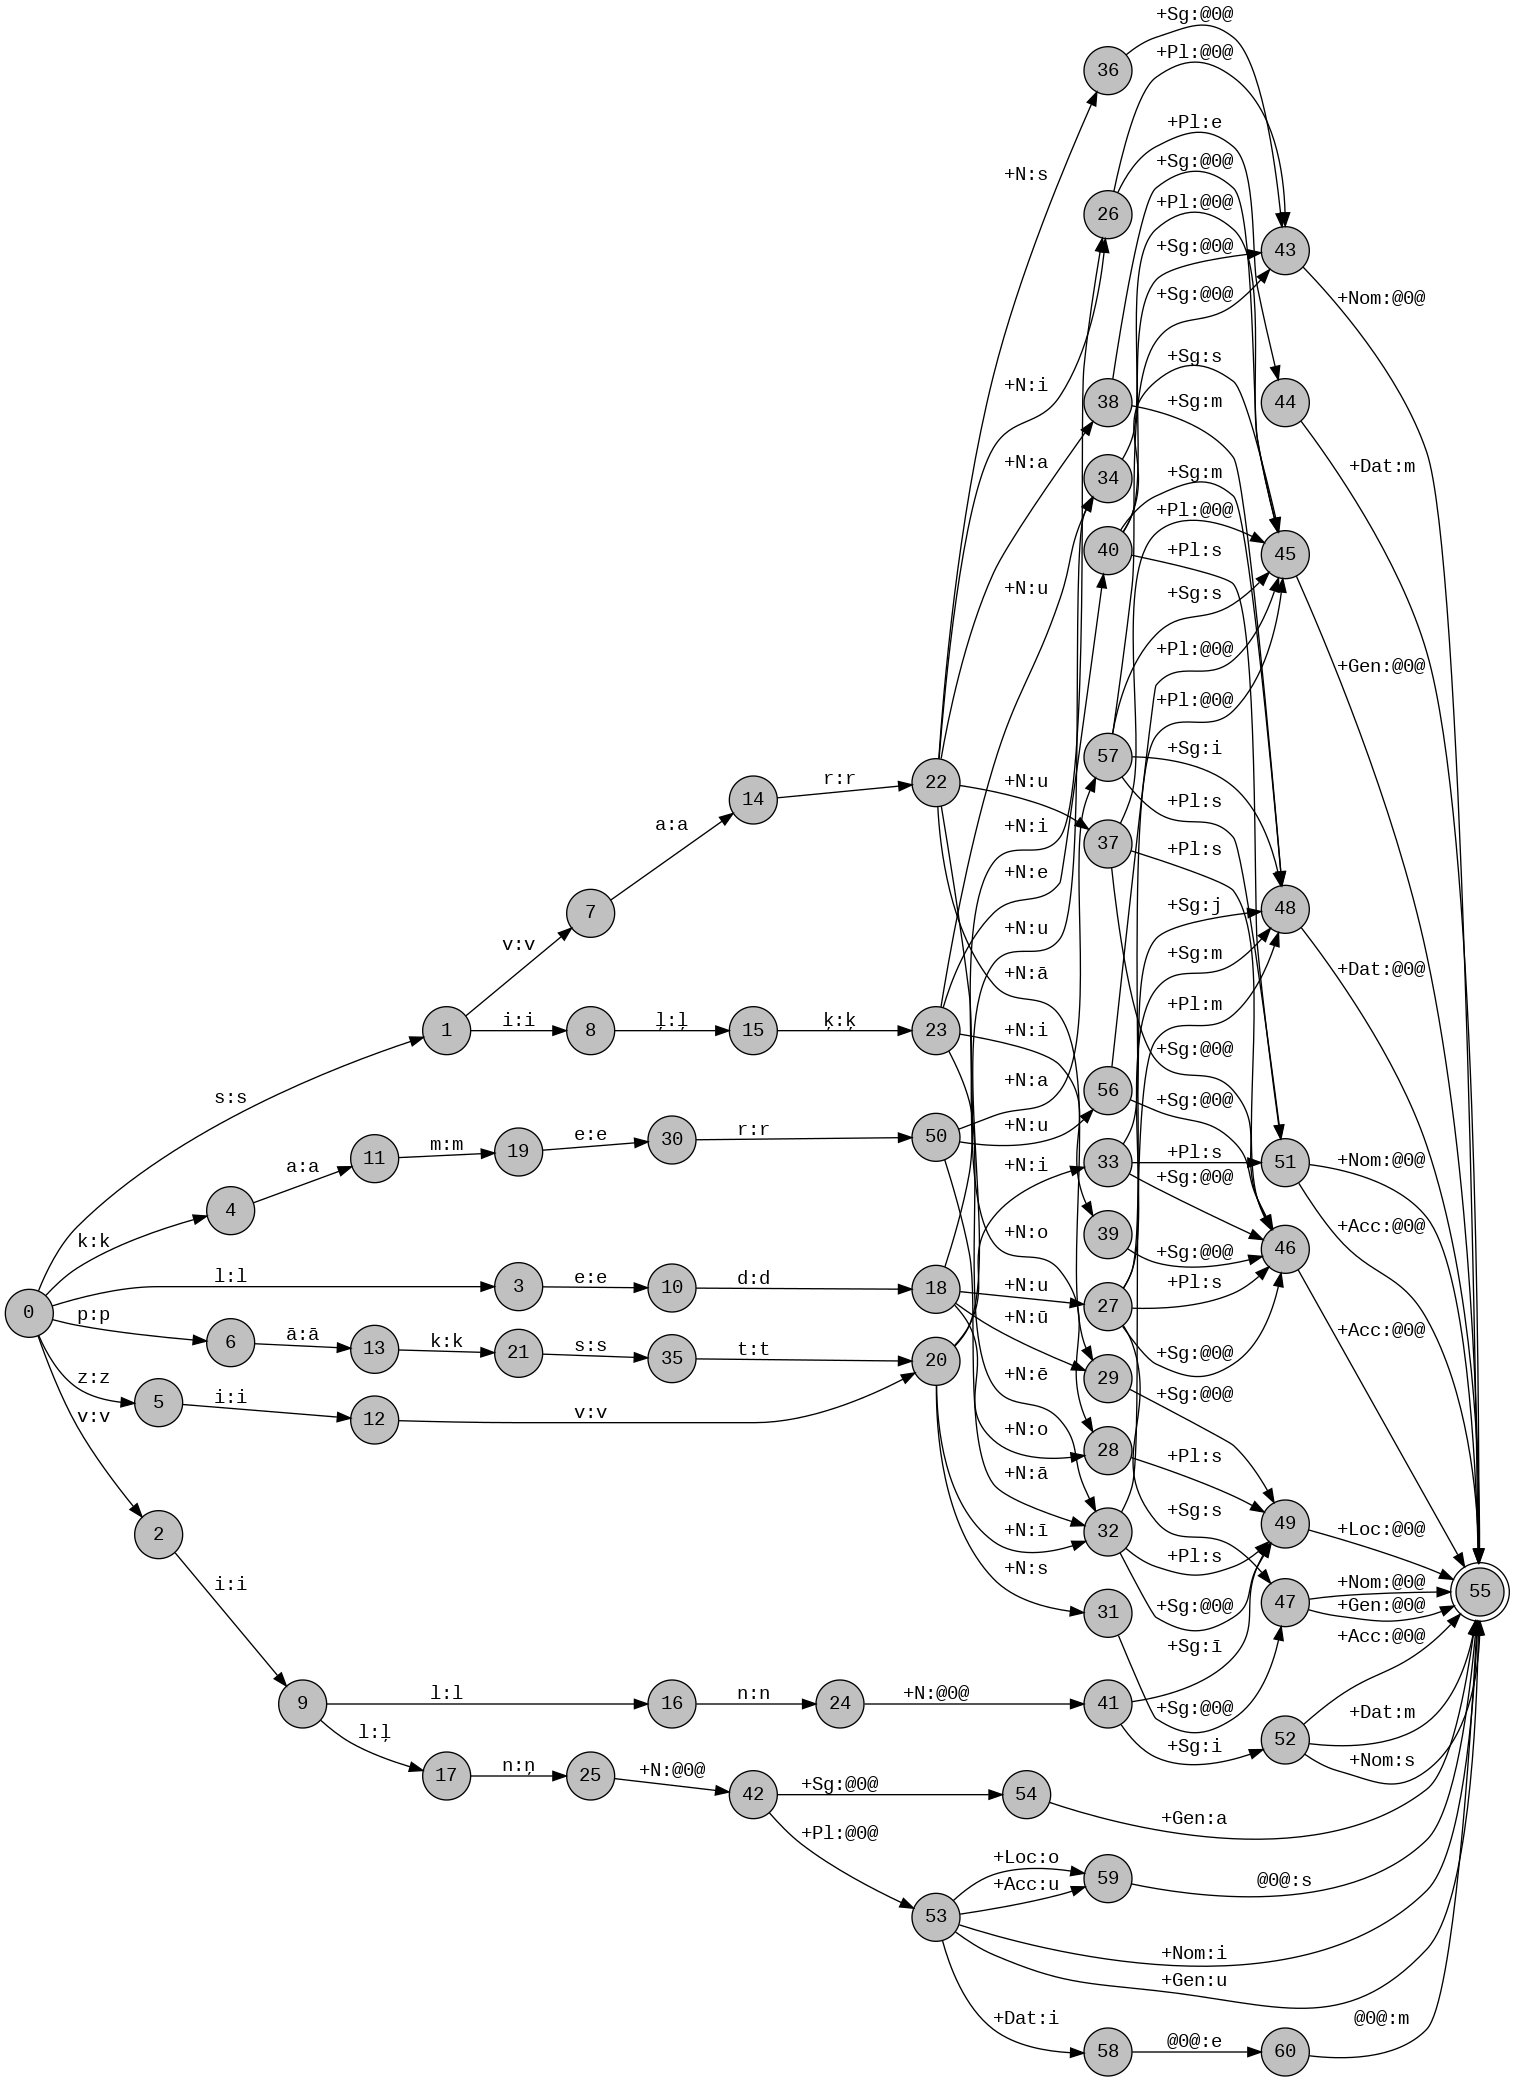

In [105]:
hfst2png(cascade,'image.png')
Image('image.png')

Izdrukāšana

In [106]:
for noun in ["svar", "viln", "led", "kamer", "siļķ", "ziv", "pākst"]:
    for number in ["Sg", "Pl"]:
        for form in ["Nom", "Gen", "Dat", "Acc", "Loc"]:
            lookup_results = cascade.lookup(noun + "+N+" + number + "+" + form)
            if lookup_results:
                result = lookup_results[0][0].replace("@_EPSILON_SYMBOL_@", "")
                print(f"{noun}+N+{number}+{form} - {result}")
            else:
                print(f"{noun}+N+{number}+{form} - NO MATCH")

svar+N+Sg+Nom - svars
svar+N+Sg+Gen - svara
svar+N+Sg+Dat - svaram
svar+N+Sg+Acc - svaru
svar+N+Sg+Loc - svarā
svar+N+Pl+Nom - svari
svar+N+Pl+Gen - svaru
svar+N+Pl+Dat - svariem
svar+N+Pl+Acc - svarus
svar+N+Pl+Loc - svaros
viln+N+Sg+Nom - vilnis
viln+N+Sg+Gen - viļņa
viln+N+Sg+Dat - vilnim
viln+N+Sg+Acc - vilni
viln+N+Sg+Loc - vilnī
viln+N+Pl+Nom - viļņi
viln+N+Pl+Gen - viļņu
viln+N+Pl+Dat - viļņiem
viln+N+Pl+Acc - viļņus
viln+N+Pl+Loc - viļņos
led+N+Sg+Nom - ledus
led+N+Sg+Gen - ledus
led+N+Sg+Dat - ledum
led+N+Sg+Acc - ledu
led+N+Sg+Loc - ledū
led+N+Pl+Nom - ledi
led+N+Pl+Gen - ledu
led+N+Pl+Dat - lediem
led+N+Pl+Acc - ledus
led+N+Pl+Loc - ledos
kamer+N+Sg+Nom - kamera
kamer+N+Sg+Gen - kameras
kamer+N+Sg+Dat - kamerai
kamer+N+Sg+Acc - kameru
kamer+N+Sg+Loc - kamerā
kamer+N+Pl+Nom - kameras
kamer+N+Pl+Gen - kameru
kamer+N+Pl+Dat - kamerām
kamer+N+Pl+Acc - kameras
kamer+N+Pl+Loc - kamerās
siļķ+N+Sg+Nom - siļķe
siļķ+N+Sg+Gen - siļķes
siļķ+N+Sg+Dat - siļķem
siļķ+N+Sg+Acc - siļķi
siļķ+N